# Q3. Regression

## Manually derived linear regression

**1. What happens if $n<m$?**

$X^T$ is a $n \times m$ matrix. if $n<m$, the null space of $X^T$ is at least $m - n > 0$. Therefore the null space of $XX^T$ is at least 1. Hence $XX^T$ is not invertible. Tu put it differently, $X^T\beta=y$ has infinitely many solutions and solving the linear regression problem in this case would be useless.

**2. What are the expectation and covariance matrix of $\hat\beta$, for a given true value of $\beta$?**

Note that the only random variable here is y and X is a matrix of constant numbers. In fact we can write $y = X^T\beta + \epsilon$ where $\epsilon \sim \mathcal{N}(0, \sigma^2I)$.  Therefore we can write:

$$E[(XX^T)^{-1}Xy] = (XX^T)^{-1} E[X(X^T\beta + \epsilon)] = (XX^T)^{-1} [(XX^T) \beta + X E[\epsilon]] = (XX^T)^{-1} [(XX^T) \beta + 0] = (XX^T)^{-1} (XX^T) \beta = \beta$$

Where we used $E[\epsilon] = 0$. Thus $E[\hat{\beta}] = \beta$.

For the variance we can write:

$$Var(\hat{\beta}) = E[((XX^T)^{-1}Xy)((XX^T)^{-1}Xy)^T] - E[(XX^T)^{-1}Xy]E[(XX^T)^{-1}Xy]^T = E[((XX^T)^{-1}Xy)((XX^T)^{-1}Xy)^T] - \beta \beta^T$$ 

We can simplify the first term:

$$E[((XX^T)^{-1}Xy)((XX^T)^{-1}Xy)^T] = E[((XX^T)^{-1}Xy)(y^T X^T ((XX^T)^{-1})^T)] = E[(XX^T)^{-1}Xyy^TX^T((XX^T)^{-1})^T] = (XX^T)^{-1}X E[yy^T] X^T((XX^T)^{-1})^T$$


but we have $E[yy^T] = \sigma^2I$. Therefore:

$$(XX^T)^{-1}X E[yy^T] X^T((XX^T)^{-1})^T = (XX^T)^{-1}X \sigma^2I X^T((XX^T)^{-1})^T = \sigma^2 (XX^T)^{-1} (XX^T) ((XX^T)^{-1})^T = \sigma^2 ((XX^T)^{-1})^T$$

As $(A^T)^{-1} = (A^{-1})^T$, we can write:
$$Var(\hat{\beta}) = \sigma^2 ((XX^T)^{-1})^T = \sigma^2 ((XX^T)^T)^{-1} = \sigma^2 (XX^T)^{-1}$$

**Show that maximizing the likelihood is equivalent to minimizing the squared error $\sum_{i=1}^n (y_i - x_i\beta)^2$. [Hint: Use $\sum_{i=1}^n a_i^2 = a^Ta$]**

Instead of working likelihood, we show that maximizing log-likelihood is equivalent to minimizig SELoss which derives the same result. We can write log-likelihood as:
$$\log L(\beta) = \log \prod_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \exp(-\frac{(y_i - \beta x_i)^2}{2\sigma^2})$$
which is equal to:
$$\sum_{i=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma} \exp(-\frac{(y_i - \beta x_i)^2}{2\sigma^2}) = n \log \frac{1}{\sqrt{2 \pi} \sigma} - \frac{1}{2\sigma ^ 2} \sum_{i=1}^{n}(y_i - \beta x_i)^2$$

The first term in the above expression is independent of $\beta$. Therefore, only the second term remains. Thus, maximizing log-likelihood is equivalent to minimizing the second term which is $\sum_{i=1}^{n} (y_i - x_i\beta)^2$ (if we ignore the constant $\frac{1}{2\sigma^2}$ in the denominator)

**4. Write the squared error in vector notation, (see above hint), expand the expression, and collect like terms. [Hint: Use $\beta^Tx^Ty = y^Tx\beta$ and $x^Tx$ is symmetric]**

Squarred error loss would be:
$$(y - X^T\beta)^T(y - X^T\beta) = (y^T - \beta^TX)(y - X^T\beta) = (y^Ty - y^TX^T\beta - \beta^TXy + \beta^TXX^T\beta)$$

According to the given hint we can rewrite this as:
$$y^Ty - 2\beta^TXy + \beta^TXX^T\beta$$

**5. Use the likelihood expression to write the negative log-likelihood. Write the derivative of the negative log-likelihood with respect to $\beta$, set equal to zero, and solve to show the maximum likelihood estimate $\hat\beta$ as above.**

We have to minimize the value derived above in wrt beta. The derivative would be:
$$0 - 2Xy + 2XX^T\beta$$

If we set it equal to zero we have:

$$Xy = XX^T\beta$$

and by multiplying both sides, from left, in $XX^T$ we can get $\hat{\beta}$:

$$\hat{\beta} = (XX^T)^{-1}Xy$$


In [1]:
import jax.numpy as jnp
from numpy.random import randn
from random import randint
from jax import random, grad
from matplotlib import pyplot as plt

In [2]:
def generate_random_seed():
    return randint(0, 10000)

In [3]:
def target_f1(x, sigma_true=0.3):
    key = random.PRNGKey(generate_random_seed())
    noise = random.normal(key, shape=x.shape)
    
    return (2 * x + sigma_true * noise).ravel()

In [80]:
def norm(a: float):
    return (a * a) ** 0.5

def element_wise_norm(x):
    shape = x.shape
    return jnp.array([norm(el) for el in x.ravel()]).reshape(shape)
  
def element_wise_sin(x):
    shape = x.shape

    return jnp.sin(x.ravel()).reshape(shape)


In [5]:
def target_f2(x: jnp.ndarray):
    key = random.PRNGKey(generate_random_seed())
    noise = random.normal(key, shape=x.shape)
    y = 2 * x + element_wise_norm(x) * 0.3 * noise
    
    return y.ravel()

In [6]:
def target_f3(x):
    key = random.PRNGKey(generate_random_seed())
    noise = random.normal(key, shape=x.shape)
    y = 2 * x + 5 * element_wise_sin(x * 0.5) + element_wise_norm(x) * 0.3 * noise
    
    return y.ravel()

## Sample data from the target functions 

In [7]:
def sample_batch(target_f, batch_size):
    key = random.PRNGKey(generate_random_seed())
    x = random.uniform(key, shape=(1, batch_size), minval=0., maxval=20.)
    y = target_f(x)
    
    return x, y

## Test assumptions about your dimensions

In [9]:
n = 200
m = 1

for target_f in [target_f1, target_f2, target_f3]:
    x, y = sample_batch(target_f, n)
    assert x.shape == (m, n)
    assert y.shape == (n,)

print('Yaay!')

Yaay!


## Plot the target functions

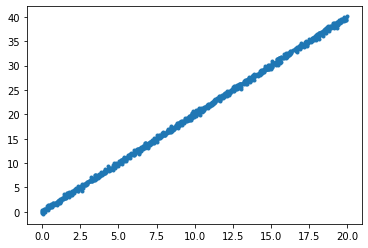

In [167]:
x, y = sample_batch(target_f1, 1000)

plt.plot(x[0], y, '.');

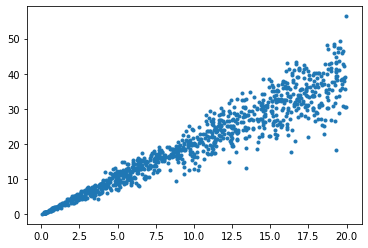

In [168]:
x, y = sample_batch(target_f2, 1000)

plt.plot(x[0], y, '.');

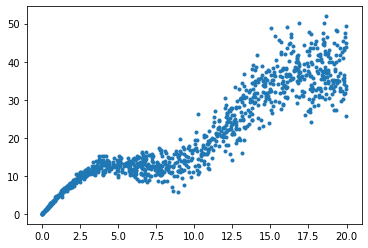

In [169]:
x, y = sample_batch(target_f3, 1000)

plt.plot(x[0], y, '.');

## Linear regression model with $\hat{\beta}$ MLE

In [8]:
from jax.numpy.linalg import inv

def beta_mle(X, y):
    beta = inv(X.dot(X.T)) @ X @ y
    
    return beta

In [11]:
n = 1000

print(beta_mle(*sample_batch(target_f1, n)))

[2.0006847]


In [172]:
n = 1000

print(beta_mle(*sample_batch(target_f2, n)))

[1.9973272]


In [173]:
n = 1000

print(beta_mle(*sample_batch(target_f3, n)))

[2.0390666]


## Plot the MLE linear regression model

In [180]:
n = 200
X, y = sample_batch(target_f1, n)
beta_hat = beta_mle(X, y)
y_hat = (X.T @ beta_hat).ravel()

In [34]:
def sort_data(X, *args):
    """
    Due to the problem I had with shading in plots, I needed to sort the data beforehand.
    """
    order = jnp.argsort(X)
    
    return (X[order], *[arg[order] for arg in args])

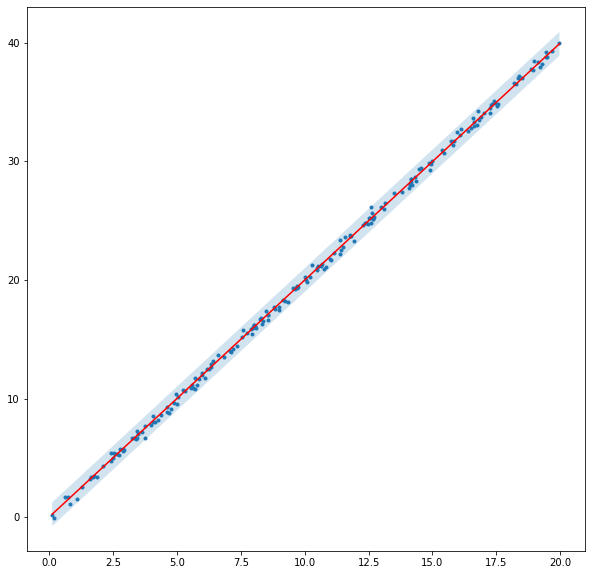

In [182]:
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, y_hat_sorted.copy()+uncertainty, alpha=0.2);

In [183]:
n = 200
X, y = sample_batch(target_f2, n)
beta_hat = beta_mle(X, y)
y_hat = (X.T @ beta_hat).ravel()

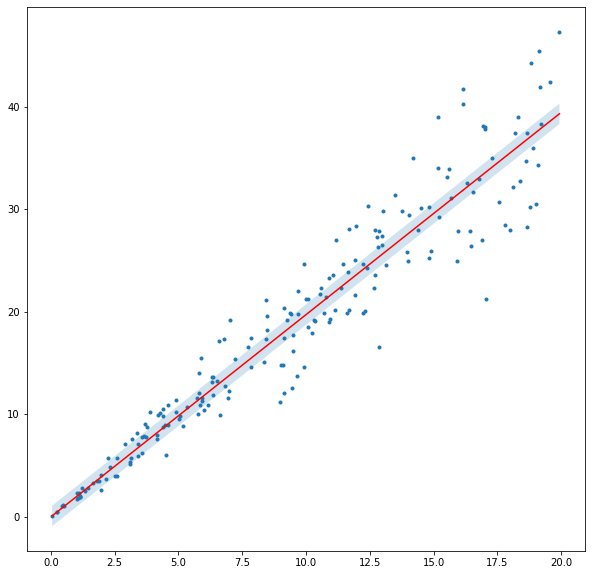

In [184]:
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)
plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');gm
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, y_hat_sorted.copy()+uncertainty, alpha=0.2);

In [185]:
n = 200
X, y = sample_batch(target_f3, n)
beta_hat = beta_mle(X, y)
y_hat = (X.T @ beta_hat).ravel()

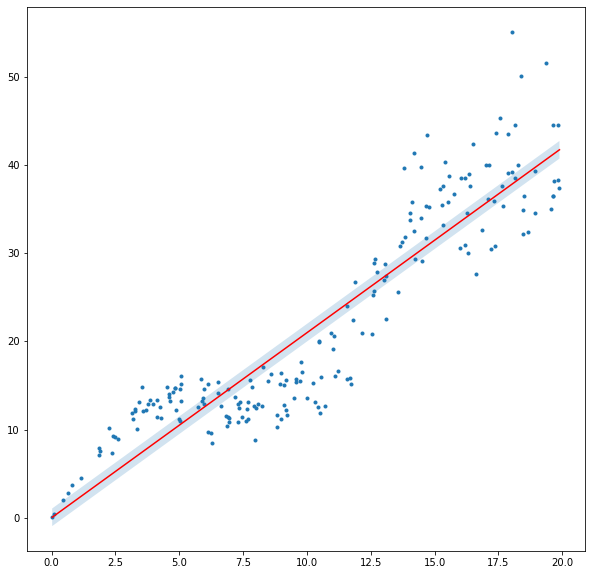

In [186]:
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)
plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, y_hat_sorted.copy()+uncertainty, alpha=0.2);

## Log-likelihood of Data under Model

In [9]:
from math import pi

def gaussian_log_likelihood(mu, sigma, x):    
    return -0.5 * jnp.log(2 * pi) - jnp.log(sigma) - 0.5 * ((x - mu) / sigma) ** 2


## Test Gaussian likelihood against standard implementation

In [25]:
from jax.scipy.stats import norm

x = np.random.randn()
mu = np.random.randn()
sigma = np.random.rand()
assert gaussian_log_likelihood(mu, sigma, x).shape == ()
assert abs(gaussian_log_likelihood(mu, sigma, x) - norm.logpdf(x, mu, sigma)) < 1e-2

x = np.random.randn(100)
mu = np.random.randn()
sigma = np.random.rand()
assert gaussian_log_likelihood(mu, sigma, x).shape == (100,)
assert np.linalg.norm(gaussian_log_likelihood(mu, sigma, x) - norm.logpdf(x, mu, sigma)) < 1e-2

x = np.random.randn(10)
mu = np.random.randn(10)
sigma = np.random.rand(10)
assert gaussian_log_likelihood(mu, sigma, x).shape == (10,)
assert np.linalg.norm(gaussian_log_likelihood(mu, sigma, x) - norm.logpdf(x, mu, sigma)) < 1e-2

print('Yaay!')

Yaay!


## Model Negative Log-likelihood

In [10]:
def lr_model_nll(beta, X, y, sigma):
    """
    This function takes the average nll loss not the sum!
    """
    return -jnp.mean(gaussian_log_likelihood(X.T.dot(beta), sigma, y))

## Compute Negative-Log-Likelihood on data

In [15]:
for n in [10, 100, 1000]:
    print("-------", n, "------")
    for i, target_f in enumerate([target_f1, target_f2, target_f3], 1):
        print(f"target_f{i}:")
        for sigma_model in [0.1, 0.3, 1., 2.]:
            X, y = sample_batch(target_f, n)
            beta = beta_mle(X, y)
            nll = lr_model_nll(beta, X, y, sigma_model)
            print(f'Negative Log-likelihood (sigma={sigma_model}):', nll)
        print()

------- 10 ------
target_f1:
Negative Log-likelihood (sigma=0.1): 3.0840688
Negative Log-likelihood (sigma=0.3): 0.058412135
Negative Log-likelihood (sigma=1.0): 0.9527103
Negative Log-likelihood (sigma=2.0): 1.6253029

target_f2:
Negative Log-likelihood (sigma=0.1): 18.992615
Negative Log-likelihood (sigma=0.3): 87.8604
Negative Log-likelihood (sigma=1.0): 4.381679
Negative Log-likelihood (sigma=2.0): 2.0206194

target_f3:
Negative Log-likelihood (sigma=0.1): 1068.7898
Negative Log-likelihood (sigma=0.3): 68.174416
Negative Log-likelihood (sigma=1.0): 5.471425
Negative Log-likelihood (sigma=2.0): 5.4330153

------- 100 ------
target_f1:
Negative Log-likelihood (sigma=0.1): 4.108435
Negative Log-likelihood (sigma=0.3): 0.17373458
Negative Log-likelihood (sigma=1.0): 0.971069
Negative Log-likelihood (sigma=2.0): 1.6253384

target_f2:
Negative Log-likelihood (sigma=0.1): 582.2185
Negative Log-likelihood (sigma=0.3): 45.583046
Negative Log-likelihood (sigma=1.0): 7.913444
Negative Log-lik

## Effect of model variance

**For each target function what is the best choice of sigma?**

## Automatic differentiation and maximum likelihood

## Compute gradients with AD, Test against hand-derived

In [49]:
key = random.PRNGKey(generate_random_seed())
key, subkey = random.split(key)

beta_test = random.normal(subkey, shape=(1,))

key, subkey = random.split(key)
sigma_test = random.normal(subkey)

n = 100

X, y = sample_batch(target_f1, n)
grad_fn = grad(lr_model_nll, argnums=0)

ad_grad = grad_fn(beta_test, X, y, sigma_test)
hand_derivative = 1/n * 1/(sigma_test ** 2) * (X @ X.T @ beta_test - X @ y)

assert (ad_grad - hand_derivative).item() < 1e-2
print('Yaay!')

Yaay!


## Train linear regression model with gradient descent

In [84]:
def train_lin_reg(target_f, beta_init, bs=100, lr=1e-6, iters=1000, sigma_model=1., 
                  print_every=1000):
    beta_curr = jnp.array([beta_init])
    
    grad_fn = grad(lr_model_nll, argnums=0)
    
    for i in range(iters):
        X, y = sample_batch(target_f1, bs)
        loss = lr_model_nll(beta_curr, X, y, sigma_model)
        if i % print_every == 0 or i == iters -1:
            print(f'iteration {i}, loss: {loss}, beta: {beta_curr[0]}')
        grad_beta = grad_fn(beta_curr, X, y, sigma_model)
        beta_curr = beta_curr - lr * grad_beta
    return beta_curr[0]

## Plot learned models

In [85]:
beta_init = -100.
beta_learned_f1 = train_lin_reg(target_f1, lr=1e-3, iters= 100, beta_init=beta_init, print_every=10)

iteration 0, loss: 695530.25, beta: -100.0
iteration 10, loss: 31514.501953125, beta: -21.960355758666992
iteration 20, loss: 2392.293701171875, beta: -4.108242988586426
iteration 30, loss: 141.00570678710938, beta: 0.5659010410308838
iteration 40, loss: 11.90237808227539, beta: 1.617439866065979
iteration 50, loss: 1.3650925159454346, beta: 1.9091993570327759
iteration 60, loss: 0.9935522675514221, beta: 1.977428913116455
iteration 70, loss: 0.9624385237693787, beta: 1.9948526620864868
iteration 80, loss: 0.9665780067443848, beta: 1.999314785003662
iteration 90, loss: 0.9669924378395081, beta: 1.9996494054794312
iteration 99, loss: 0.968819260597229, beta: 2.0007200241088867


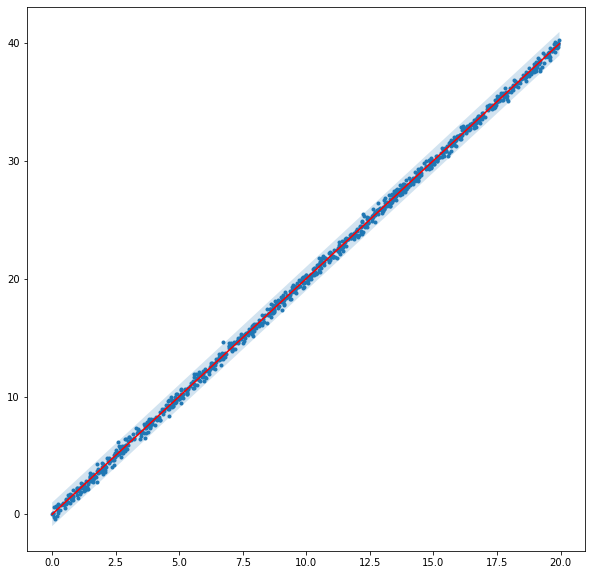

In [86]:
X, y = sample_batch(target_f1, 1000)
y_hat = (X.T @ jnp.array([beta_learned_f1])).ravel()
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, 
                 y_hat_sorted.copy()+uncertainty, alpha=0.2);

In [87]:
beta_init = -1045.43
beta_learned_f2 = train_lin_reg(target_f2, lr=1e-3, iters= 100, beta_init=beta_init, print_every=10)

iteration 0, loss: 71597600.0, beta: -1045.4300537109375
iteration 10, loss: 3327742.75, beta: -240.8540802001953
iteration 20, loss: 246607.28125, beta: -55.82860565185547
iteration 30, loss: 12637.732421875, beta: -11.035815238952637
iteration 40, loss: 741.8230590820312, beta: -1.3372020721435547
iteration 50, loss: 51.09690475463867, beta: 1.1445693969726562
iteration 60, loss: 3.654705286026001, beta: 1.7937183380126953
iteration 70, loss: 1.1138404607772827, beta: 1.9534534215927124
iteration 80, loss: 0.9887776374816895, beta: 1.9890962839126587
iteration 90, loss: 0.9648057818412781, beta: 1.9969314336776733
iteration 99, loss: 0.9568040370941162, beta: 1.9981322288513184


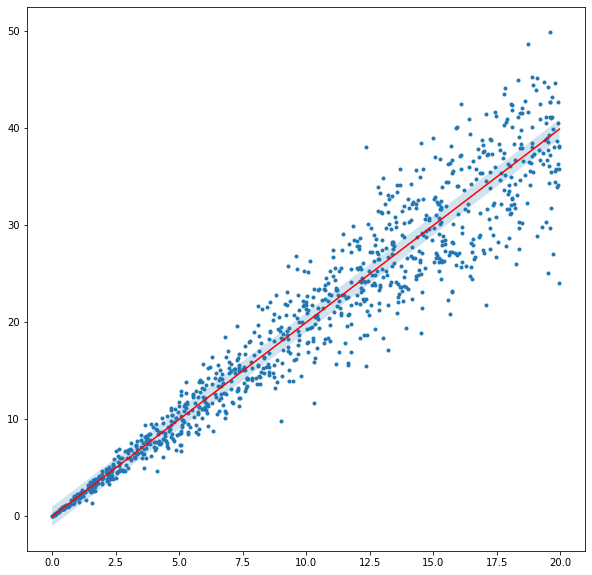

In [88]:
X, y = sample_batch(target_f2, 1000)
y_hat = (X.T @ jnp.array([beta_learned_f2])).ravel()
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, 
                 y_hat_sorted.copy()+uncertainty, alpha=0.2);

In [89]:
beta_init = -1045.43
beta_learned_f3 = train_lin_reg(target_f3, lr=1e-3, iters= 100, beta_init=beta_init, print_every=10)

iteration 0, loss: 70481304.0, beta: -1045.4300537109375
iteration 10, loss: 5197366.0, beta: -263.5350341796875
iteration 20, loss: 249470.6875, beta: -62.82470703125
iteration 30, loss: 18420.13671875, beta: -14.21027946472168
iteration 40, loss: 924.4586791992188, beta: -1.666813611984253
iteration 50, loss: 59.8269157409668, beta: 1.1058728694915771
iteration 60, loss: 4.434779167175293, beta: 1.7793068885803223
iteration 70, loss: 1.1073418855667114, beta: 1.9460408687591553
iteration 80, loss: 0.9745045304298401, beta: 1.9868106842041016
iteration 90, loss: 0.9703724384307861, beta: 1.9970945119857788
iteration 99, loss: 0.9639522433280945, beta: 2.001152515411377


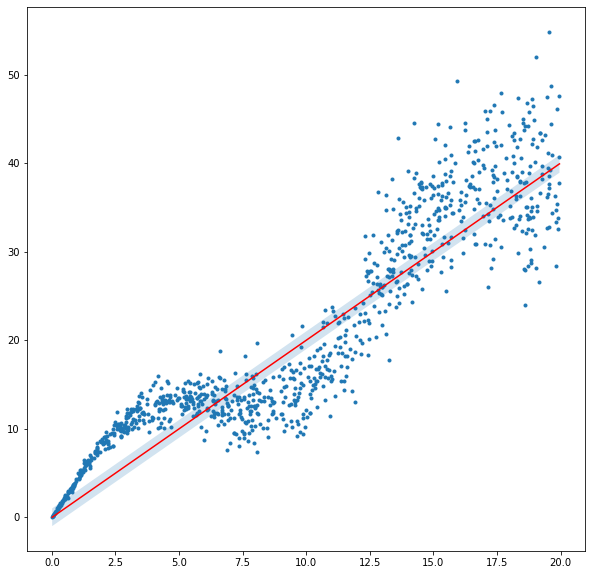

In [90]:
X, y = sample_batch(target_f3, 1000)
y_hat = (X.T @ jnp.array([beta_learned_f3])).ravel()
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, 
                 y_hat_sorted.copy()+uncertainty, alpha=0.2);

## Fully connected neural network

In [91]:
def neural_network(x, theta):
    w1, b1 = theta['w1'], theta['b1']
    w2, b2 = theta['w2'], theta['b2']
    
    out = jnp.tanh(x.T @ w1 + b1)
    out = out @ w2 + b2
    
    return out.ravel()

## Test model assumptions

In [92]:
theta = {'w1': randn(1, 10), 'b1': randn(10,), 'w2': randn(10, 1), 'b2': randn(1,)}
n = 100
X = randn(1, n)
assert neural_network(X, theta).shape == (100,)
print('Yaay!')

Yaay!


## Negative log-likelihood of NN model

In [93]:
def nn_model_nll(theta, X, y, sigma=1.):
    """
    This function takes the average nll loss not the sum!
    """
    return -jnp.mean(gaussian_log_likelihood(neural_network(X, theta), sigma, y))

## Training model to maximize Likelihood

In [100]:
def train_nn_reg(target_f, theta_init, bs=100, lr=1e-3, iters=1000, sigma_model=1., 
                 print_every=100):
    theta_curr = theta_init
    grad_fn = grad(nn_model_nll, argnums=0)

    for i in range(iters):
        X, y = sample_batch(target_f, bs)
        loss = nn_model_nll(theta_curr, X, y, sigma_model)
        if i % print_every == 0 or i == iters - 1:
            print(f'iteration {i}, loss: {loss}')
        grad_theta = grad_fn(theta_curr, X, y, sigma_model)
        for par in theta_curr:
            theta_curr[par] -= lr * grad_theta[par]
    
    return theta_curr 

## Learn model parameters & Plot neural network regression

In [105]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 'w2': randn(10, 1), 'b2': randn(1,)}
theta_learned = train_nn_reg(target_f1, theta_init, lr=1e-3, iters=1000, print_every=100)

iteration 0, loss: 372.18634033203125
iteration 100, loss: 75.48041534423828
iteration 200, loss: 38.113563537597656
iteration 300, loss: 22.781503677368164
iteration 400, loss: 14.033673286437988
iteration 500, loss: 12.48324966430664
iteration 600, loss: 6.3160014152526855
iteration 700, loss: 3.716982364654541
iteration 800, loss: 5.678422451019287
iteration 900, loss: 4.16624641418457
iteration 999, loss: 4.429479598999023


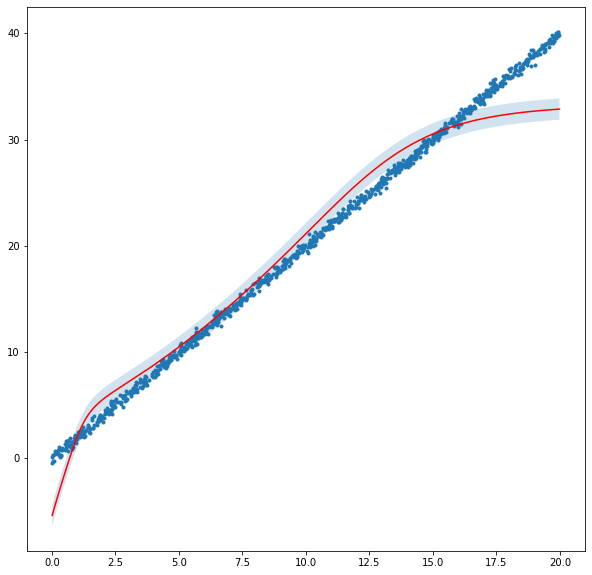

In [106]:
X, y = sample_batch(target_f1, 1000)
y_hat = neural_network(X, theta_learned)
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, 
                 y_hat_sorted.copy()+uncertainty, alpha=0.2);

In [107]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 'w2': randn(10, 1), 'b2': randn(1,)}
theta_learned = train_nn_reg(target_f2, theta_init, lr=1e-3, iters=1000, print_every=100)

iteration 0, loss: 187.07394409179688
iteration 100, loss: 55.904972076416016
iteration 200, loss: 36.9810905456543
iteration 300, loss: 26.198501586914062
iteration 400, loss: 21.6041316986084
iteration 500, loss: 12.581140518188477
iteration 600, loss: 11.85784912109375
iteration 700, loss: 9.627582550048828
iteration 800, loss: 7.910226821899414
iteration 900, loss: 6.843225002288818
iteration 999, loss: 6.916143417358398


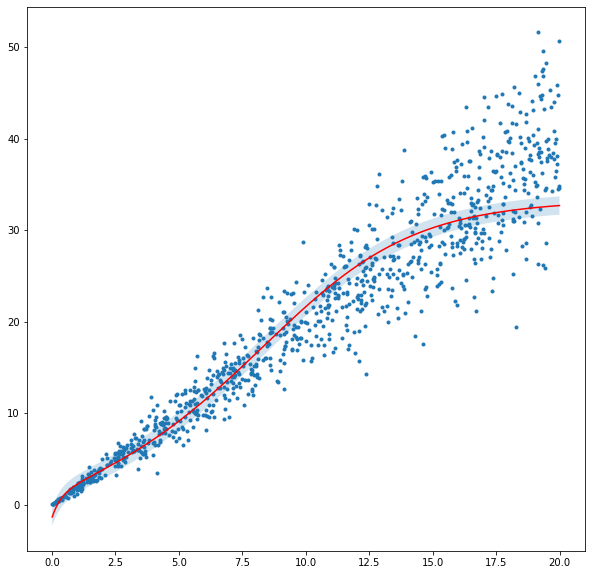

In [108]:
X, y = sample_batch(target_f2, 1000)
y_hat = neural_network(X, theta_learned)
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, 
                 y_hat_sorted.copy()+uncertainty, alpha=0.2);

In [113]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 'w2': randn(10, 1), 'b2': randn(1,)}
theta_learned = train_nn_reg(target_f3, theta_init, lr=1e-3, iters=2000, print_every=200)

iteration 0, loss: 269.8338928222656
iteration 200, loss: 46.84765625
iteration 400, loss: 21.05194854736328
iteration 600, loss: 27.298818588256836
iteration 800, loss: 16.562450408935547
iteration 1000, loss: 16.057994842529297
iteration 1200, loss: 17.04452133178711
iteration 1400, loss: 11.771540641784668
iteration 1600, loss: 17.603925704956055
iteration 1800, loss: 9.717445373535156
iteration 1999, loss: 15.294386863708496


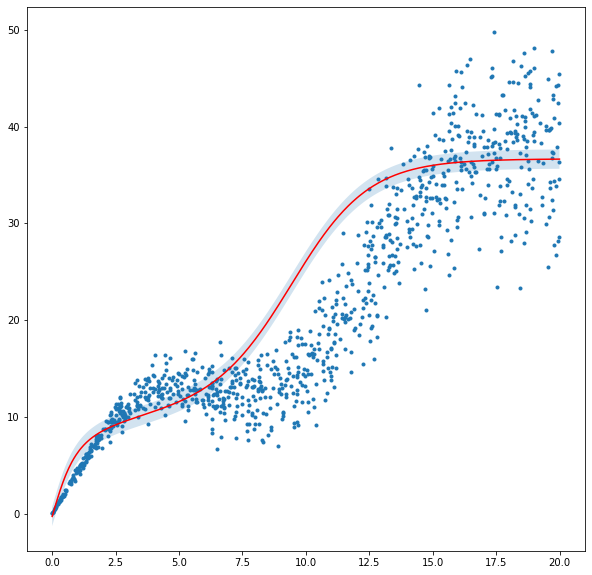

In [114]:
X, y = sample_batch(target_f3, 1000)
y_hat = neural_network(X, theta_learned)
X_sorted, y_sorted, y_hat_sorted = sort_data(X[0], y, y_hat)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, y_hat_sorted, 'r');
uncertainty = [1.] * len(y_hat_sorted)
plt.fill_between(X_sorted, y_hat_sorted.copy()-uncertainty, 
                 y_hat_sorted.copy()+uncertainty, alpha=0.2);

## Input dependent variance

In [135]:
def neural_net_w_var(x, theta):
    w1, b1 = theta['w1'], theta['b1']
    w2, b2 = theta['w2'], theta['b2']
    
    out = jnp.tanh(x.T @ w1 + b1)
    out = out @ w2 + b2
    
    mean = out[:, 0]
    log_sigma = out[:, 1]
    
    return mean, log_sigma

## Test model assumptions

In [136]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 'w2': randn(10, 2), 'b2': randn(2,)}
n = 100
X, y = sample_batch(target_f1, n)

mean, log_sigma = neural_net_w_var(X, theta_init)
assert mean.shape == (100,)
assert log_sigma.shape == (100,)

print('Yaay!')

Yaay!


## Negative log-likelihood with modelled variance

In [137]:
def nn_with_var_model_nll(theta, x, y):
    mean, log_sigma = neural_net_w_var(x, theta)
    return -jnp.mean(gaussian_log_likelihood(mean, jnp.exp(log_sigma), y))

## Write training loop

In [138]:
def train_nn_w_var_reg(target_f, theta_init, bs=100, lr=1e-6, iters=10000, print_every=10):
    theta_curr = theta_init
    grad_fn = grad(nn_with_var_model_nll, argnums=0)
    
    for i in range(iters):
        X, y = sample_batch(target_f, bs)
        loss = nn_with_var_model_nll(theta_curr, X, y)
        if i % print_every == 0 or i == iters - 1:
            print(f'iteration {i}, loss: {loss}')
        grad_theta = grad_fn(theta_curr, X, y)
        for par in theta_curr:
            theta_curr[par] -= lr * grad_theta[par]
    
    return theta_curr 

## Learn model with input-dependent variance & Plot model

In [155]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 
              'w2': randn(10, 2), 'b2': randn(2,)}
theta_learned = train_nn_w_var_reg(target_f1, theta_init, iters=10000, print_every=500, 
                                   lr=1e-4, bs=256)

iteration 0, loss: 23.062238693237305
iteration 500, loss: 4.496199607849121
iteration 1000, loss: 4.4512224197387695
iteration 1500, loss: 4.452008247375488
iteration 2000, loss: 4.366448879241943
iteration 2500, loss: 4.450658321380615
iteration 3000, loss: 4.278117656707764
iteration 3500, loss: 4.290834903717041
iteration 4000, loss: 4.279414653778076
iteration 4500, loss: 4.277789115905762
iteration 5000, loss: 4.273720741271973
iteration 5500, loss: 4.264880180358887
iteration 6000, loss: 4.310825824737549
iteration 6500, loss: 4.163493633270264
iteration 7000, loss: 4.282164096832275
iteration 7500, loss: 4.222474575042725
iteration 8000, loss: 4.23431396484375
iteration 8500, loss: 4.323176860809326
iteration 9000, loss: 4.219166278839111
iteration 9500, loss: 4.254668235778809
iteration 9999, loss: 4.228629112243652


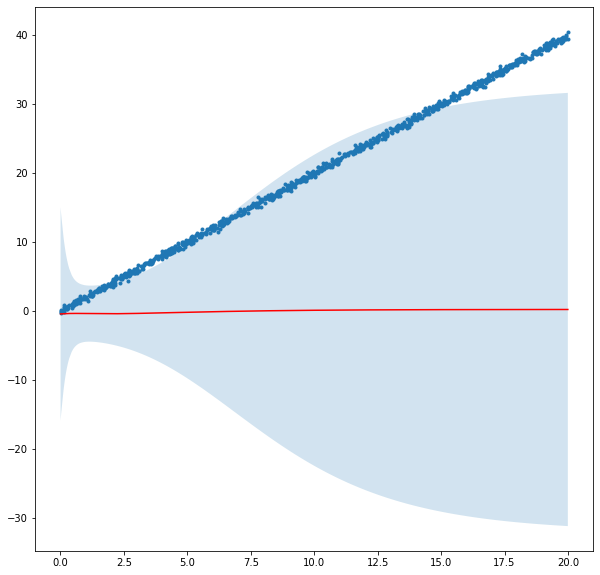

In [157]:
X, y = sample_batch(target_f1, 1000)
mean, log_sigma = neural_net_w_var(X, theta_learned)

X_sorted, y_sorted, mean_sorted, log_sigma_sorted = sort_data(X[0], y, mean, log_sigma)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, mean_sorted, 'r');
uncertainty = [1.] * len(mean_sorted)
plt.fill_between(X_sorted, mean_sorted.copy()-jnp.exp(log_sigma_sorted), 
                 mean_sorted.copy()+jnp.exp(log_sigma_sorted), alpha=0.2);

Note: It was trickier that what I thought! In fact predicting two parameters at the same time make this process difficult... I think the problem with my model is that it is not learning mean properly and tries to compensate that by making variance bigger. In fact, this can be a local minima in which the model gets stuck. This might be overcome using better initialization. I tried different stds for the initialization of weights (0.1 and 0.01 and 0.001). However, in all of the cases the mean was not changing at all and it mostly the variance that was being learned. I wanted to do a more exhaustive search to find better hyperparameters, however, I could not as I did not have access to any GPUs and was running on the CPU of my laptop. 

In [148]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 
              'w2': randn(10, 2)*2, 'b2': randn(2,)*2}
theta_learned = train_nn_w_var_reg(target_f2, theta_init, iters=5000, print_every=500, 
                                   lr=1e-6, bs=256)

iteration 0, loss: 32.33778381347656
iteration 500, loss: 5.4941534996032715
iteration 1000, loss: 4.846490383148193
iteration 1500, loss: 4.618736267089844
iteration 2000, loss: 4.505937576293945
iteration 2500, loss: 4.604677200317383
iteration 3000, loss: 4.435009956359863
iteration 3500, loss: 4.334693908691406
iteration 4000, loss: 4.410558700561523
iteration 4500, loss: 4.2918500900268555
iteration 4999, loss: 4.290377140045166


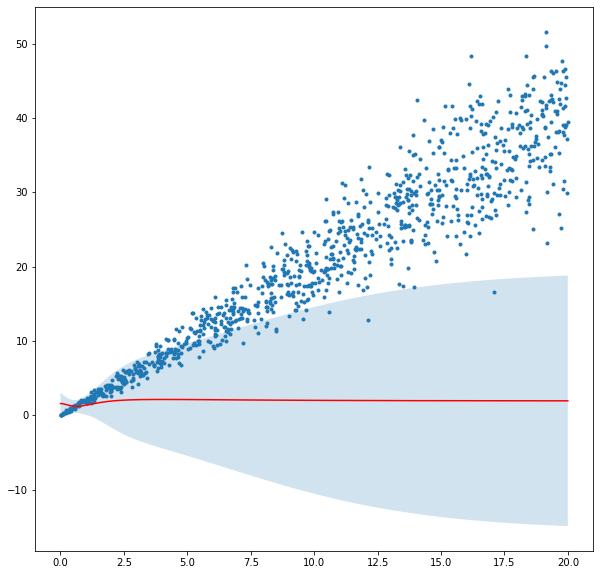

In [149]:
X, y = sample_batch(target_f2, 1000)
mean, log_sigma = neural_net_w_var(X, theta_learned)

X_sorted, y_sorted, mean_sorted, log_sigma_sorted = sort_data(X[0], y, mean, log_sigma)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, mean_sorted, 'r');
uncertainty = [1.] * len(mean_sorted)
plt.fill_between(X_sorted, mean_sorted.copy()-jnp.exp(log_sigma_sorted), 
                 mean_sorted.copy()+jnp.exp(log_sigma_sorted), alpha=0.2);

In [158]:
theta_init = {'w1': randn(1, 10), 'b1': randn(10,), 
              'w2': randn(10, 2), 'b2': randn(2,)}
theta_learned = train_nn_w_var_reg(target_f3, theta_init, iters=10000, print_every=500, 
                                   lr=1e-4, bs=256)

iteration 0, loss: 4.37979793548584
iteration 500, loss: 4.361379146575928
iteration 1000, loss: 4.3455047607421875
iteration 1500, loss: 4.304889678955078
iteration 2000, loss: 4.19901704788208
iteration 2500, loss: 4.258981704711914
iteration 3000, loss: 4.254028797149658
iteration 3500, loss: 4.237459182739258
iteration 4000, loss: 4.227425575256348
iteration 4500, loss: 4.185097694396973
iteration 5000, loss: 4.231231689453125
iteration 5500, loss: 4.281516075134277
iteration 6000, loss: 4.182871341705322
iteration 6500, loss: 4.121823787689209
iteration 7000, loss: 4.230964183807373
iteration 7500, loss: 4.316128730773926
iteration 8000, loss: 4.198155403137207
iteration 8500, loss: 4.24950647354126
iteration 9000, loss: 4.27836275100708
iteration 9500, loss: 4.1965765953063965
iteration 9999, loss: 4.181919574737549


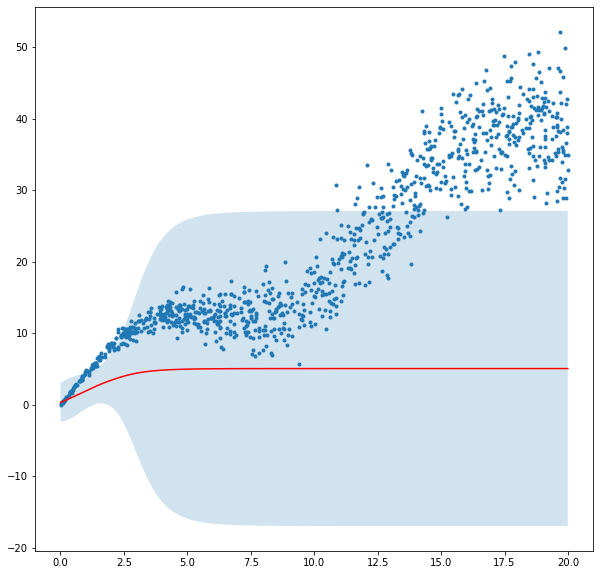

In [160]:
X, y = sample_batch(target_f3, 1000)
mean, log_sigma = neural_net_w_var(X, theta_learned)

X_sorted, y_sorted, mean_sorted, log_sigma_sorted = sort_data(X[0], y, mean, log_sigma)

plt.figure(figsize=(10, 10))
plt.plot(X_sorted, y_sorted, '.');
plt.plot(X_sorted, mean_sorted, 'r');
uncertainty = [1.] * len(mean_sorted)
plt.fill_between(X_sorted, mean_sorted.copy()-jnp.exp(log_sigma_sorted), 
                 mean_sorted.copy()+jnp.exp(log_sigma_sorted), alpha=0.2);